# Exploratory Data Analysis Churn Analysis


###### https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Pandas show all column
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
df = pd.read_csv("dataset.csv")

# Data Understanding

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
#show columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Yang perlu diperhatikan:
- Apakah ada data dengan tipe yang kurang sesuai? Misal, Name dengan tipe int64
- Apakah ada data yang hilang? Cari kolom dengan count < jumlah row

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else float(x))
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Summary:
*   SeniorCitizen seharusnya bertipe data object
*   TotalCharges seharusnya bertipe data float



In [ ]:
df = df.drop("customerID", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Summary:
*   customerID tidak diperlukan untuk analisis, sehingga variabel dapat didrop



In [ ]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Summary:
* Drop nilai kosong pada TotalCharges karena lebih baik dihilangkan daripada diisi namun tidak tentu benar adanya



In [ ]:
cats=[i for i in df.columns if df[i].dtypes == 'object' and i not in ['Churn']]
nums=[i for i in df.columns if df[i].dtypes != 'object']

Pemisahan variabel categorical dan numerical

Penyimpanan kolom diatas memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom gender:
Male      3549
Female    3483
Name: gender, dtype: int64

Value count kolom SeniorCitizen:
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Value count kolom Partner:
No     3639
Yes    3393
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2099
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6352
No      680
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Value count kolom OnlineBackup:
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: 

## Statistical summary

Selanjutnya kita munculkan ringkasan statistik dataframe

### Pendekatan numerik

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah nilai maksimal/minimal masih berada di batas wajar? Min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data
- Apakah ada kolom dengan perbedaan yang signifikan antara mean dan median? Perbedaan antara mean/median mengindikasikan outlier atau skewed distribution

Summary:
* Nilai yang tertera masuk akal, namun terdapat ketidakmasukakalan dalam variabel TotalCharges
* Nilai minimal dari TotalCharges tidak dalam batas wajar, karena terlalu jauh dari mean maupun median
* Kolom TotalCharges memiliki perbedaan signifikan, dimana median jauh lebih kecil dari mean, yang mengindikasikan nilai distribusi miring ke kanan (positive skewed distribution)

### Pendekatan kategorik

In [ ]:
df[cats].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


Yang perlu diperhatikan:
- Apakah jumlah unique values masuk akal?
- Apakah frekuensi dari nilai yang paling umum terlalu timpang? Apabila distribusi nilai terlalu timpang, feature tidak akan terlalu berguna dalam klasifikasi

Summary:
* Terdapat unique values yang tidak masuk akal, contohnya value hanya memungkinkan berisi Yes/No, namun unique values tertulis 3
* Terdapat frekuensi nilai yang terlalu timpang, jika jumlah (count) berkisar 7000an, maka nilai freq yang tidak terlalu timpang seharusnya berkisar 3000an

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Boxplot

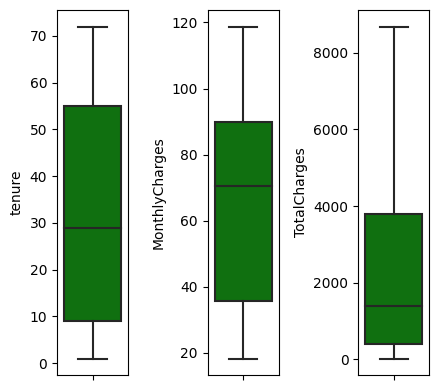

In [ ]:
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Yang perlu diperhatikan:
- Berapa banyak dan berapa jauh outlier di setiap kolom? Definisi umum outlier: berjarak 1.5x IQR dari Q1/Q3
- Bagaimana Distribusi Datanya ?

Summary:
* Tidak terdapat outlier pada ketiga variabel di atas.
* tenure paling banyak pada rentang 10 hingga 55, dengan center value 30.
* MonthlyCharges paling banyak pada rentang 40 hingga 90, dengan center value 70.
* TotalCharges paling banyak pada rentang 500 hingga 4000, dengan center value 1000.

### Histplot

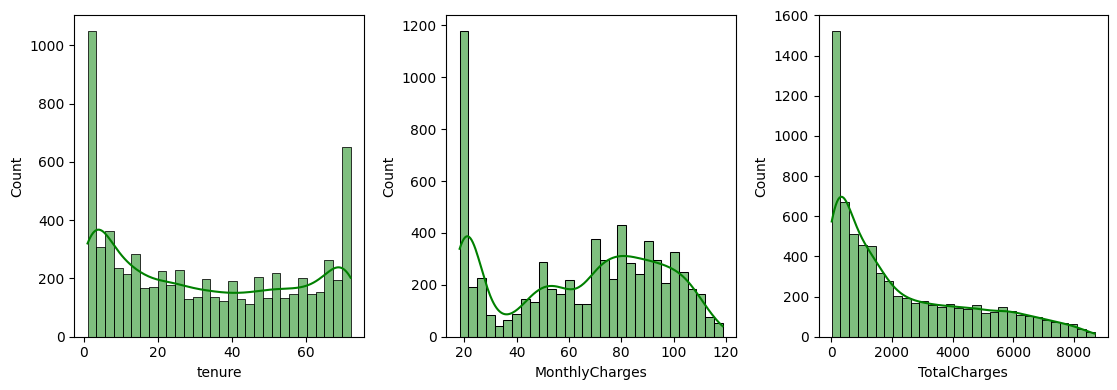

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 30)
    plt.tight_layout()

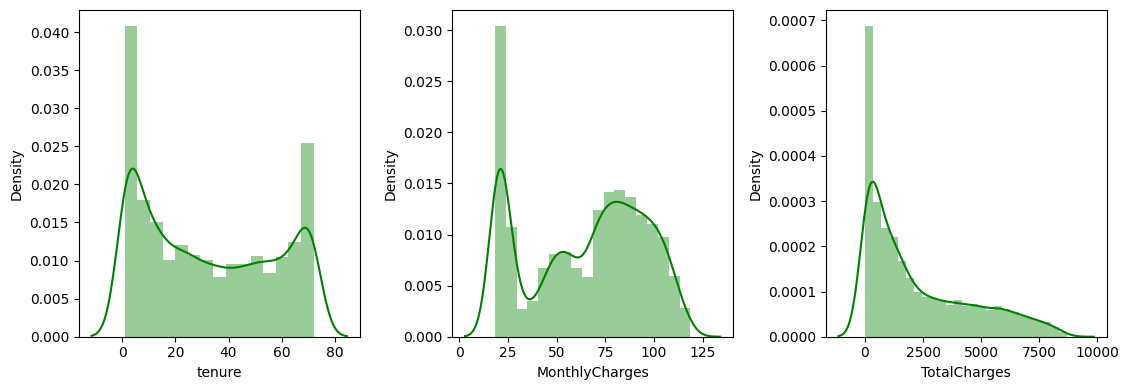

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

Yang perlu diperhatikan:
- Bagaimana bentuk distribusi setiap kolom? Apakah normal? Positive skewed? Negative skewed? Bimodal?
- Apakah ada nilai-nilai tertentu yang umum? Lonjakan pada distribution plot mungkin menmiliki makna tertentu

Summary:
* Pada variabel SeniorCitizen, tenure, dan MonthlyCharges bentuk distribusi adalah Bimodal. Sedangkan pada TotalCharges bentuk distribusinya Positive-Skewed
* Lonjakan pada distribusi bermakna banyaknya frekuensi pada value dari variabel

### Countplot (categorical)

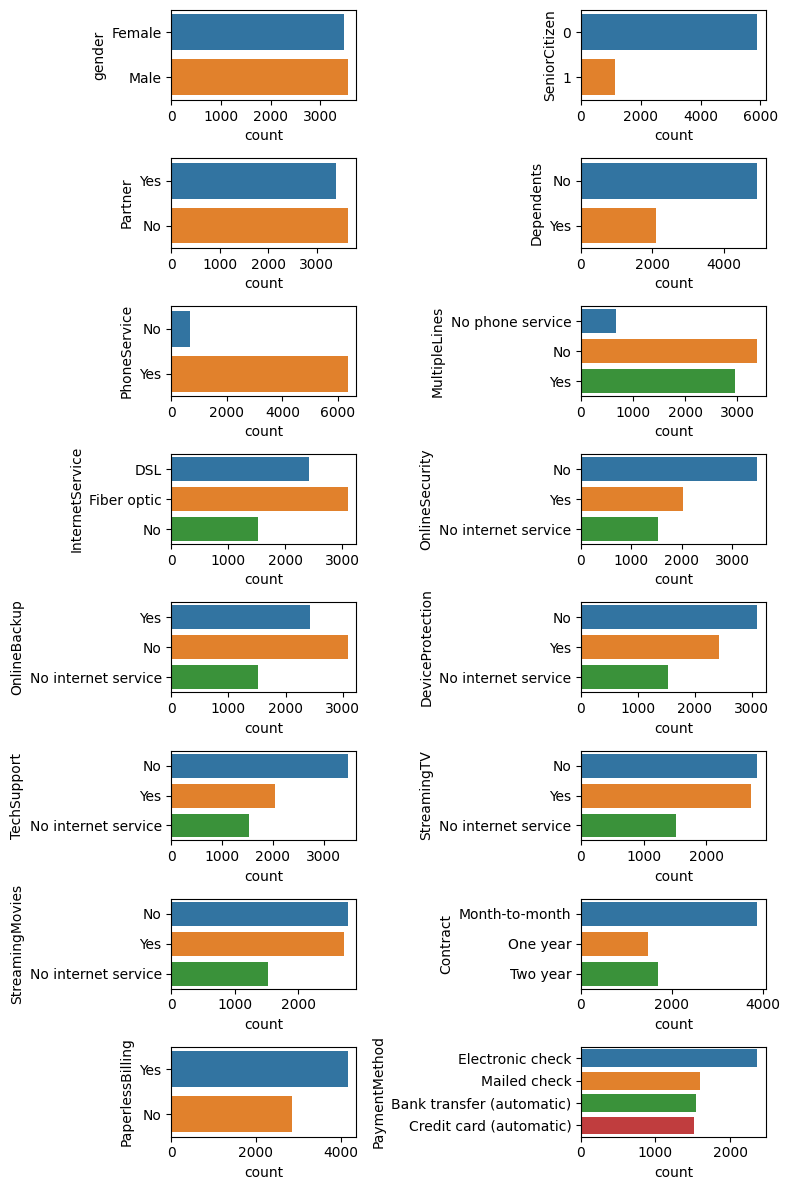

In [ ]:
plt.figure(figsize=(8, 12))
for i in range(0, len(cats)):
    plt.subplot(8, 2, i+1)
    sns.countplot(y = df[cats[i]], orient='v')
    plt.tight_layout()

Yang perlu diperhatikan:
- Ketimpangan antar kategori, terutama pada target Sebaran kategori yang timpang pada feature merupakan indikasi ketidakgunaan feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

## Multivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<Axes: >

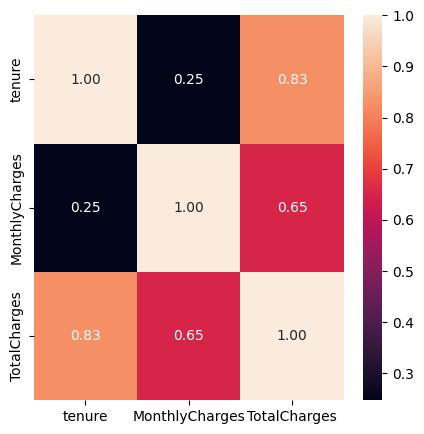

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target? Bila tidak, maka model linear tidak dapat digunakan
- Apakah ada 2 feature yang berkorelasi kuat (>0.9)? Bila ya, ada kemungkinan besar kedua feature tersebut redundan

In [ ]:
df2 = pd.get_dummies(df, drop_first=True)

In [ ]:
df2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
df2.corr()['Churn_Yes']

tenure                                  -0.354049
MonthlyCharges                           0.192858
TotalCharges                            -0.199484
gender_Male                             -0.008545
SeniorCitizen_1                          0.150541
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
PhoneService_Yes                         0.011691
MultipleLines_No phone service          -0.011691
MultipleLines_Yes                        0.040033
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
OnlineSecurity_No internet service      -0.227578
OnlineSecurity_Yes                      -0.171270
OnlineBackup_No internet service        -0.227578
OnlineBackup_Yes                        -0.082307
DeviceProtection_No internet service    -0.227578
DeviceProtection_Yes                    -0.066193
TechSupport_No internet service         -0.227578
TechSupport_Yes                         -0.164716


Summary:
* Feature tenure dengan target memiliki korelasi lemah.
* Feature MonthlyCharges dan TotalCharges dengan target memiliki korelasi sangat lemah.
* Tidak ada feature yang berkorelasi >0.9, kecuali korelasi dengan feature itu sendiri.

### Category Plot

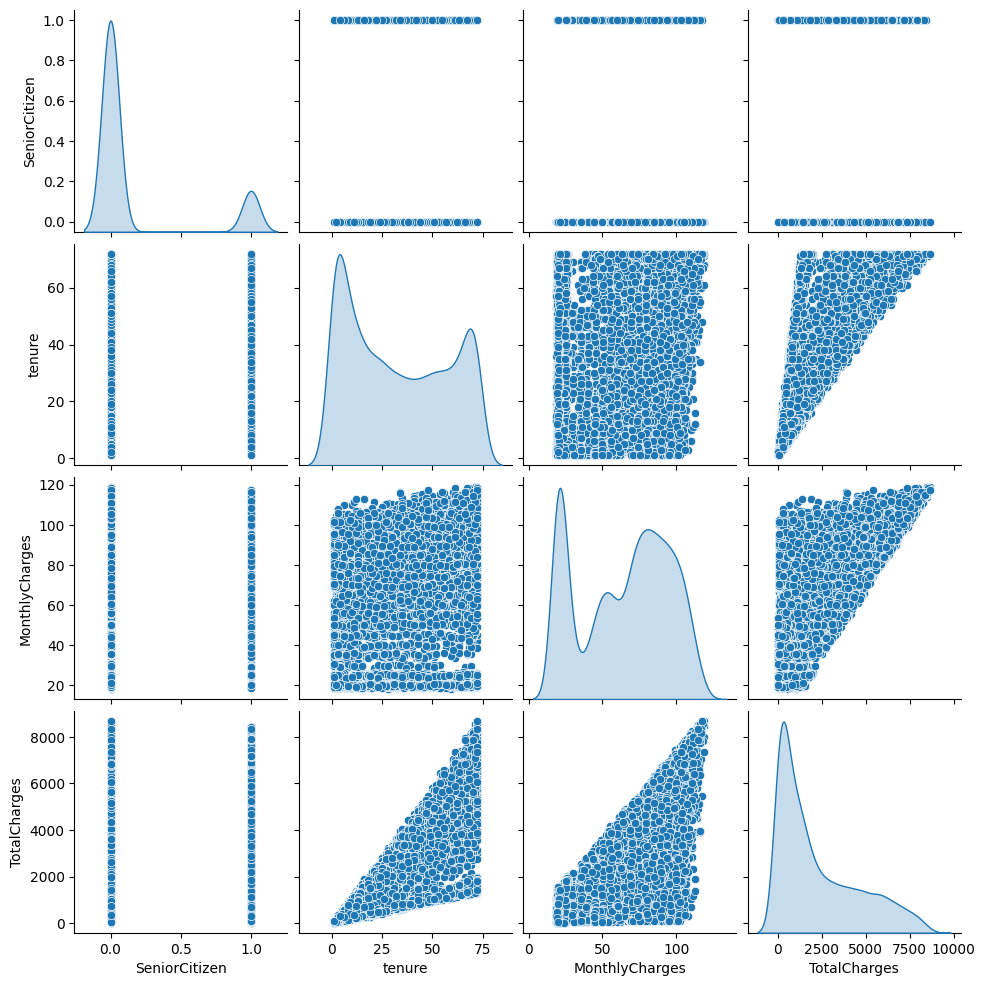

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

**Apakah ada scatter plot yang menunjukkan cluster yang
cukup jelas? Pola pada scatter plot bisa menjadi petunjuk untuk membuat feature baru**

Summary:
* Terdapat scatter plot yang menunjukkan cluster dengan cukup jelas, yakni tenure-TotalCharges dan MonthlyCharges-TotalCharges

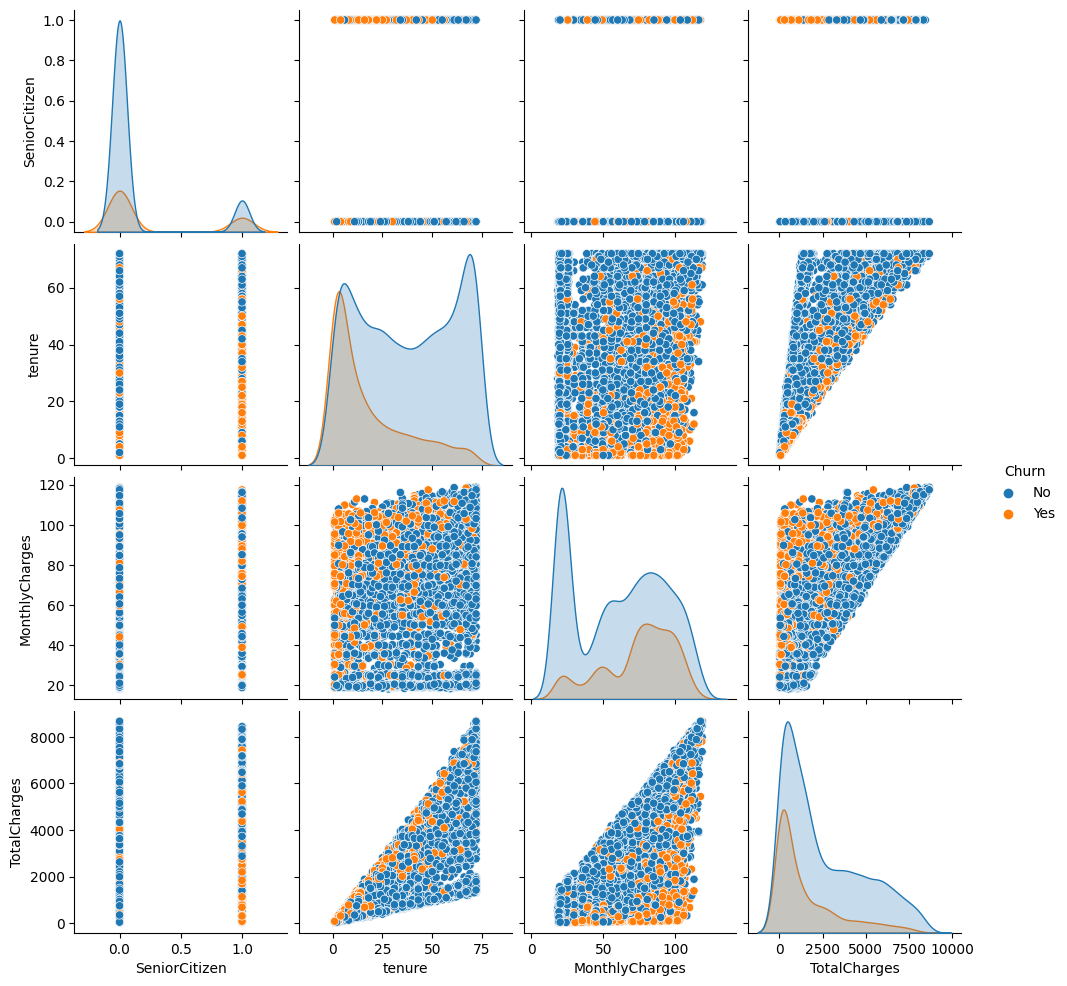

In [ ]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Churn')

Yang perlu diperhatikan:
- Apakah ada scatter plot dimana kedua warna terpisah dengan baik? Scatter plot dimana target terpisah dapat menjadi indikasi kombinasi fitur yang baik

Summary:
* Tidak ada scatter plot dimana kedua warna terpisah, dari fitur di atas, scatter plot hanya bertumpukan walaupun hanya sebagian.

# Kesimpulan

Dari analisis data yang telah dilakukan, dapat diketahui bahwa beberapa yang perlu dilakukan yaitu Data Understanding, Data Cleaning, dan Data Visualizing.

Terdapat beberapa jenis analisis yaitu:
1. Univariate Analysis (meringkas satu variabel saja, biasanya menggunakan boxplot, histogram, distplot, dlsb)
2. Bivariate Analysis (membandingkan dua variabel, biasanya menggunakan scatterplot, heatmap, dlsb)
3. Multivariate Analysis (membandingkan beberapa variabel, menggunakan visualisasi sama seperti bivariate, namun penggunaan lebih dari dua variabel)